# My Playground


In [112]:
%%time
import numba as nb
xmin = -2
xmax = 1
ymin = -1
ymax = 1
maxiter = 2560
width = 1000
height = 1000
@nb.njit(parallel=True)
def mandel(xmin,xmax,ymin,ymax,width,height,maxiter):
    pixels = np.zeros((height,width),dtype=np.uint32)
    for i in range(height):
        y = ymin + (ymax - ymin) * i / (height - 1)
        for j in range(width):
            x = xmin + (xmax - xmin) * j / (width - 1)
            c = x+1j*y
            z = 0
            for k in range(maxiter):
                if abs(z) > 2.0:
                    break
                z = z*z + c
            pixels[i,j] = k
    return pixels

CPU times: user 1.32 ms, sys: 7.6 ms, total: 8.93 ms
Wall time: 13.4 ms


In [117]:
%%time
pixels=mandel(xmin,xmax,ymin,ymax,width,width,maxiter)


CPU times: user 4.06 s, sys: 38.6 ms, total: 4.1 s
Wall time: 4.11 s


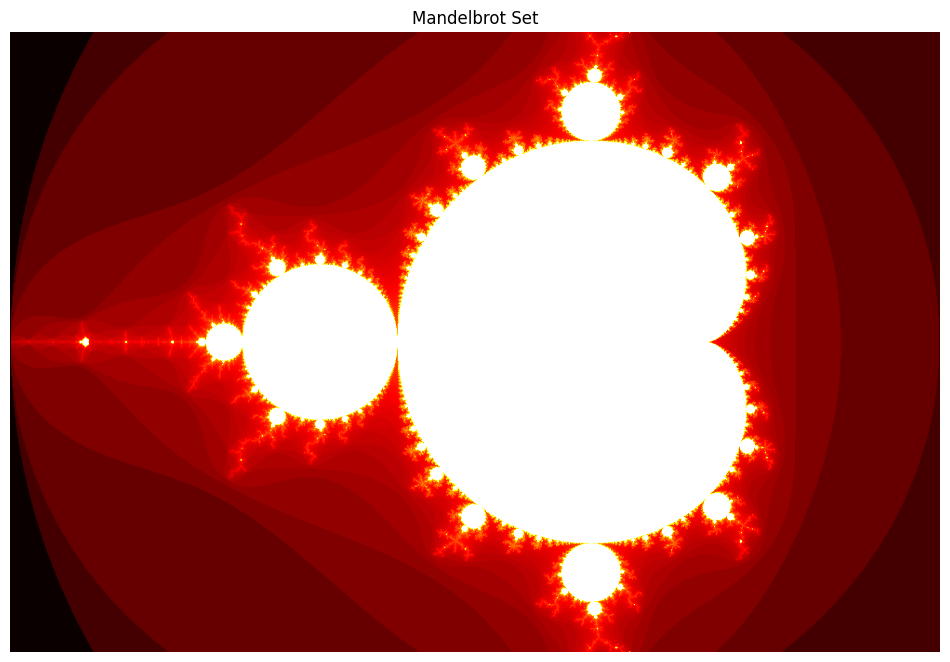

CPU times: user 644 ms, sys: 65.9 ms, total: 710 ms
Wall time: 546 ms


In [116]:
%%time 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.tight_layout()
plt.axis('off')
plt.imshow(np.log(pixels), extent=(xmin, xmax, ymin, ymax), cmap='hot')
plt.title('Mandelbrot Set')
plt.show()

In [100]:
%%time

import numpy as np
def mandel_numpy(xmin,xmax,ymin,ymax,width,height,maxiter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin*1j, ymax*1j, height)
    X = np.zeros((width, height))
    Y = np.zeros((width, height))
    X,Y = np.meshgrid(x, y)
    c = X +  Y
    z = np.zeros_like(c)
    limit = np.zeros(c.shape, dtype=np.int32)
    for k in range(maxiter):
        mask = (np.abs(z) < 1.5)
        limit[mask]=k
        z[mask] = z[mask]**2 + c[mask]
    return z,limit

CPU times: user 13 µs, sys: 79 µs, total: 92 µs
Wall time: 93.9 µs


In [102]:
z,limit = mandel_numpy(xmin,xmax,ymin,ymax,width,width,maxiter)

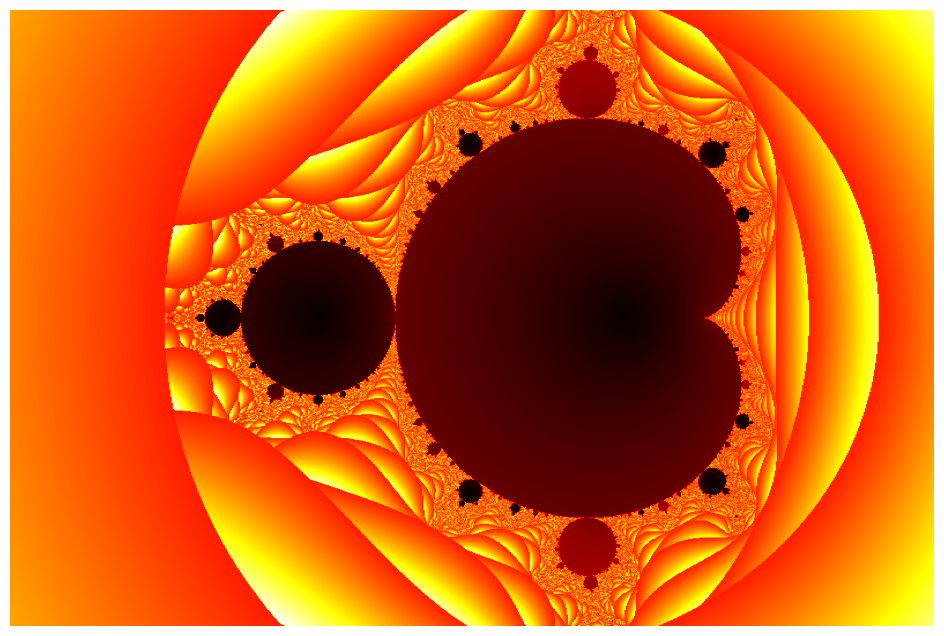

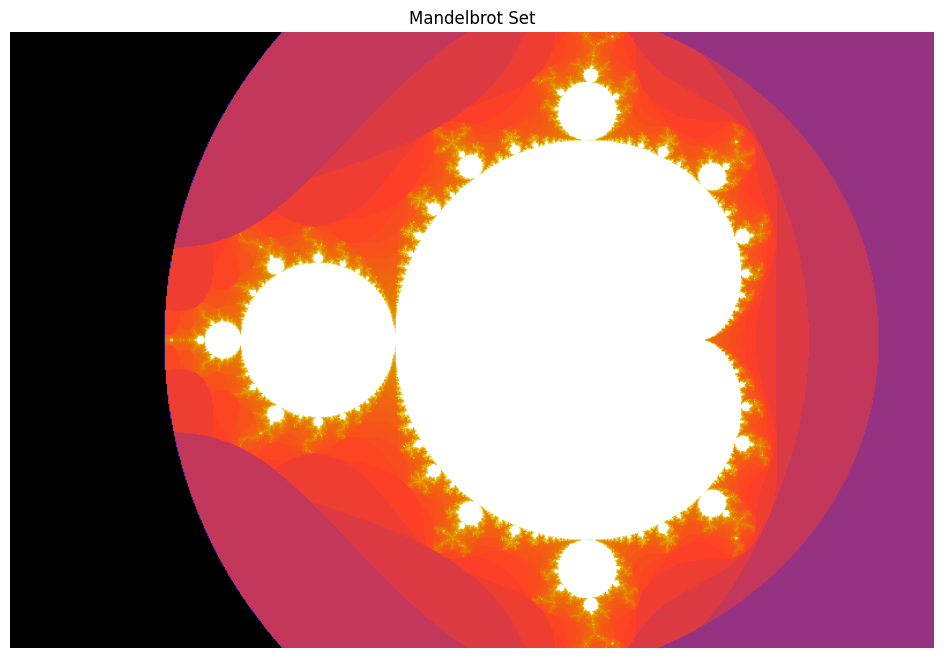

In [88]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(np.abs(z),extent=(xmin,xmax,ymin,ymax), cmap='hot')
plt.show()
plt.figure(figsize=(12, 8))
plt.axis('off')

plt.imshow(np.log(np.abs(limit)+0.01),extent=(xmin,xmax,ymin,ymax), cmap='CMRmap')
plt.title('Mandelbrot Set')
plt.show()


In [89]:
from matplotlib import colormaps
list(enumerate(sorted(colormaps)))

[(0, 'Accent'),
 (1, 'Accent_r'),
 (2, 'Blues'),
 (3, 'Blues_r'),
 (4, 'BrBG'),
 (5, 'BrBG_r'),
 (6, 'BuGn'),
 (7, 'BuGn_r'),
 (8, 'BuPu'),
 (9, 'BuPu_r'),
 (10, 'CMRmap'),
 (11, 'CMRmap_r'),
 (12, 'Dark2'),
 (13, 'Dark2_r'),
 (14, 'GnBu'),
 (15, 'GnBu_r'),
 (16, 'Grays'),
 (17, 'Greens'),
 (18, 'Greens_r'),
 (19, 'Greys'),
 (20, 'Greys_r'),
 (21, 'OrRd'),
 (22, 'OrRd_r'),
 (23, 'Oranges'),
 (24, 'Oranges_r'),
 (25, 'PRGn'),
 (26, 'PRGn_r'),
 (27, 'Paired'),
 (28, 'Paired_r'),
 (29, 'Pastel1'),
 (30, 'Pastel1_r'),
 (31, 'Pastel2'),
 (32, 'Pastel2_r'),
 (33, 'PiYG'),
 (34, 'PiYG_r'),
 (35, 'PuBu'),
 (36, 'PuBuGn'),
 (37, 'PuBuGn_r'),
 (38, 'PuBu_r'),
 (39, 'PuOr'),
 (40, 'PuOr_r'),
 (41, 'PuRd'),
 (42, 'PuRd_r'),
 (43, 'Purples'),
 (44, 'Purples_r'),
 (45, 'RdBu'),
 (46, 'RdBu_r'),
 (47, 'RdGy'),
 (48, 'RdGy_r'),
 (49, 'RdPu'),
 (50, 'RdPu_r'),
 (51, 'RdYlBu'),
 (52, 'RdYlBu_r'),
 (53, 'RdYlGn'),
 (54, 'RdYlGn_r'),
 (55, 'Reds'),
 (56, 'Reds_r'),
 (57, 'Set1'),
 (58, 'Set1_r'),
 (59, 'S

In [90]:
cmaps = {}

gradient = np.linspace(0, 1, 1024)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

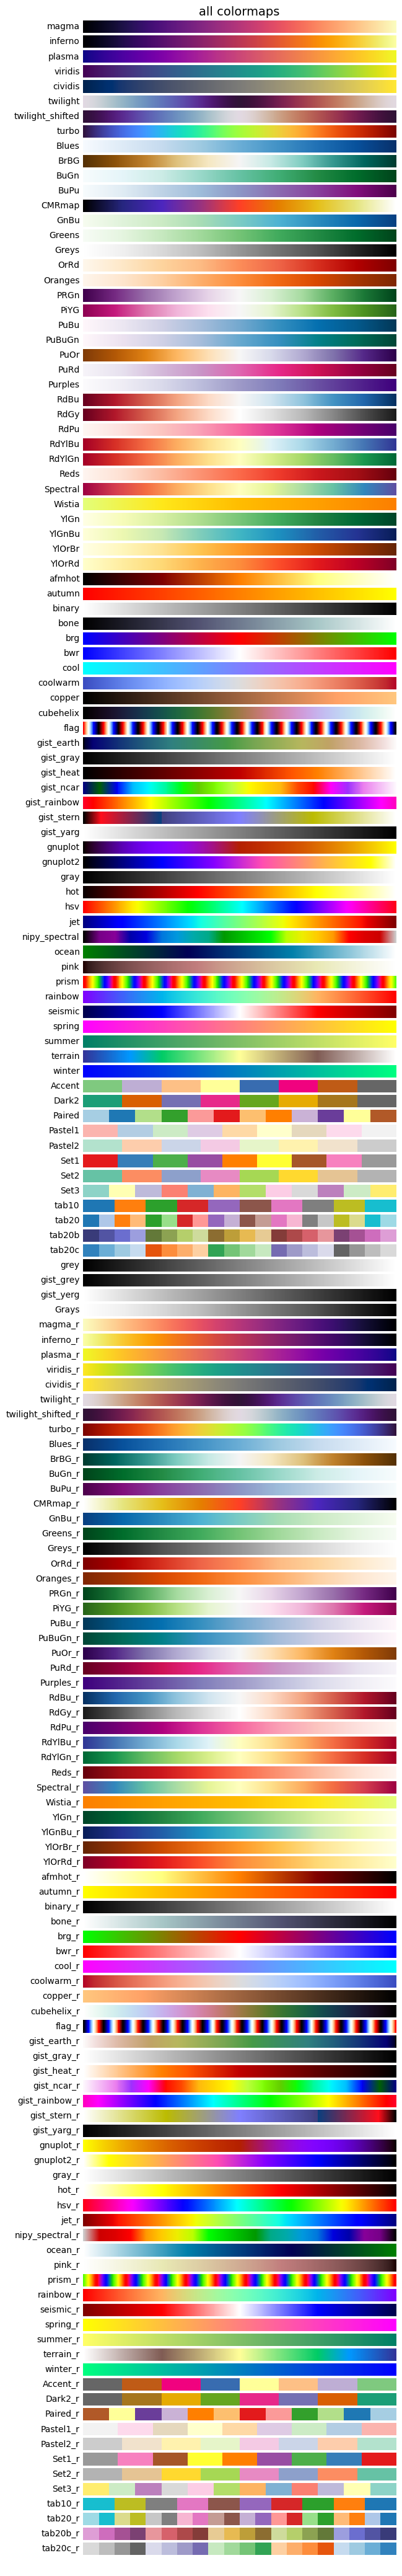

In [91]:
plot_color_gradients('all',
                     list(colormaps))

plt.show()

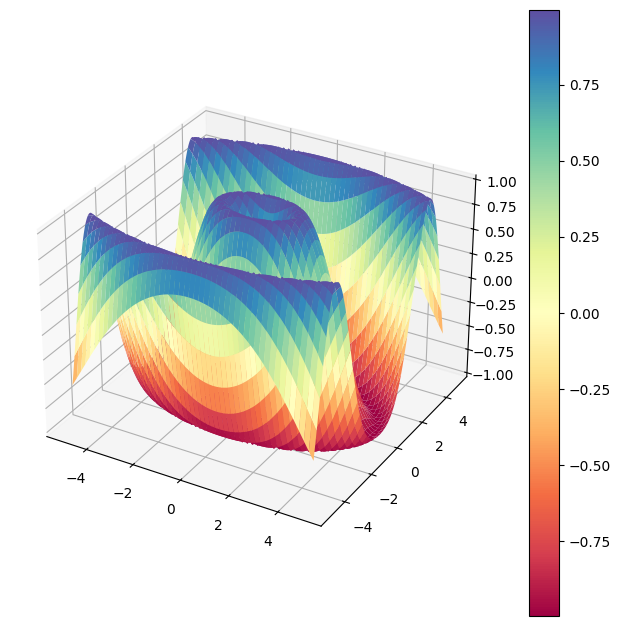

In [92]:


x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + 3*Y**2))

fig = plt.figure(figsize=(20/2.54, 20/2.54))  # Convert cm to inches
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='Spectral')
fig.colorbar(surf)
plt.show()
